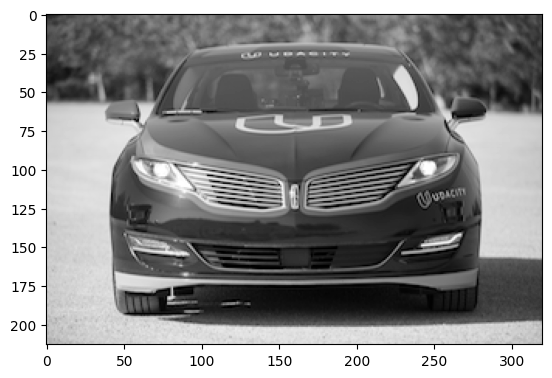

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path ='sdc.png'

bgr_img = cv2.imread(img_path)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

gray_img = gray_img.astype('float32') / 255.0

plt.imshow(gray_img, cmap='gray')
plt.show()

In [4]:
import numpy as np
filter_vals = np.array([[-1, -1, -1,-1], [-1, -1, 1, 1], [1, 1, -1, -1], [-2,-2,-2,-2]])
print('filter shape: ', filter_vals.shape)


filter shape:  (4, 4)


In [5]:
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

print('Filter 1: \n', filter_1)


Filter 1: 
 [[-1 -1 -1 -1]
 [-1 -1  1  1]
 [ 1  1 -1 -1]
 [-2 -2 -2 -2]]


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        k_height, k_width = weight.shape[-2:]
        self.conv = nn.Conv2d(1,4, kernel_size=(k_height,k_width),bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        self.pool = nn.MaxPool2d(2,2)

    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pool_x = self.pool(activated_x)

        return conv_x, activated_x, pool_x

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


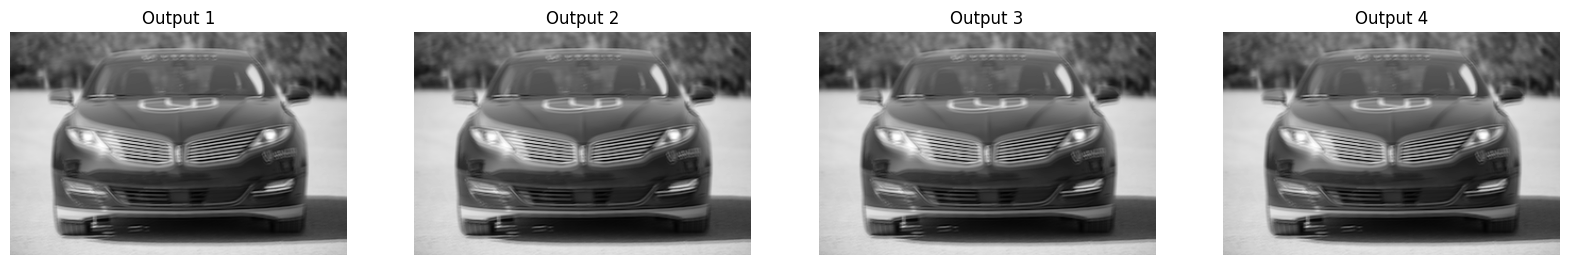

In [12]:
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20,20))

    for i in range(n_filters):
        ax = fig.add_subplot(1,n_filters,i+1)
        plt.imshow(np.squeeze(layer[0,1].data.numpy()), cmap='gray')
        plt.axis('off')
        ax.set_title('Output %s' % str(i+1))

gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
""" vector 1D tensor, vector 2D row vector,"""

conv_layer, activated_layer, pool_layer = model(gray_img_tensor)

viz_layer(activated_layer)

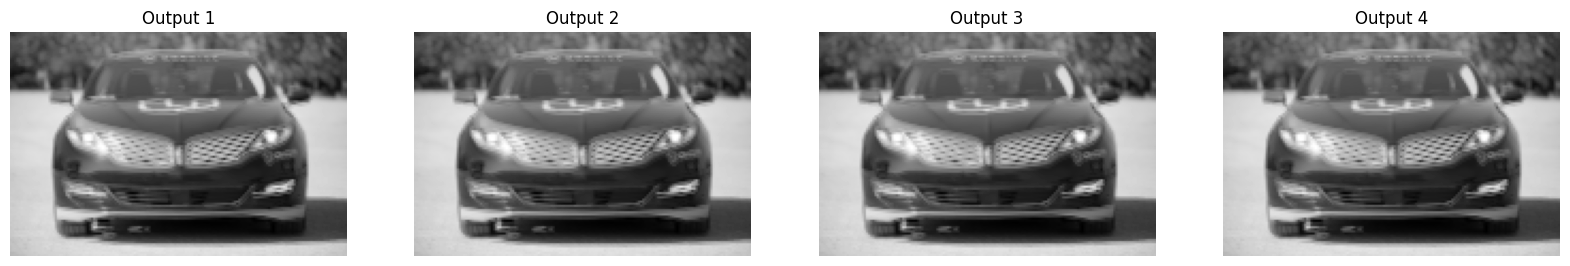

In [14]:
viz_layer(pool_layer)